# Importing Library & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
path_dataset = "/content/CO2 Emissions_Canada.csv"
df = pd.read_csv(path_dataset)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
df.shape

(7385, 12)

In [ ]:
# Renaming Columns
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'}, inplace=True)

In [ ]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

In [ ]:
df['fuel_type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [ ]:
fueltype_mapping = {
    'E': 'Ethanol',
    'Z': 'Premium',
    'D': 'Diesel',
    'X': 'Regular',
    'N': 'Natural'
}

df['fuel_type'] = df['fuel_type'].replace(fueltype_mapping)
df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Premium,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Premium,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Premium,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Premium,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Premium,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Premium,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Premium,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Premium,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Premium,11.2,8.3,9.9,29,232


## Grouping

In [ ]:
df['vehicle_class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [ ]:
def vehicleclass_by_size(vehicle_class):
    small_classes = ["COMPACT", "SUBCOMPACT", "MINICOMPACT", "TWO-SEATER", "STATION WAGON - SMALL"]
    medium_classes = ["MID-SIZE", "STATION WAGON - MID-SIZE", "SUV - SMALL"]
    large_classes = ["FULL-SIZE", "SUV - STANDARD", "PICKUP TRUCK - STANDARD", "VAN - CARGO", "VAN - PASSENGER", "MINIVAN", "SPECIAL PURPOSE VEHICLE", "PICKUP TRUCK - SMALL"]

    if vehicle_class in small_classes:
        return "Small"
    elif vehicle_class in medium_classes:
        return "Medium"
    elif vehicle_class in large_classes:
        return "Large"
    return vehicle_class

df['vehicle_class'] = df['vehicle_class'].apply(vehicleclass_by_size)
df[['vehicle_class']]

,vehicle_class
0,Small
1,Small
2,Small
3,Medium
4,Medium
...,...
7380,Medium
7381,Medium
7382,Medium
7383,Large


## Checking Missing Values & Duplicated Data

In [ ]:
# Checking Missing/NaN/Null values
df.isna().sum()

,0
make,0
model,0
vehicle_class,0
engine_size,0
cylinders,0
transmission,0
fuel_type,0
fuel_cons_city,0
fuel_cons_hwy,0
fuel_cons_comb,0


In [ ]:
# Checking Duplicates
df.duplicated().sum()

1109

In [ ]:
# Drop duplicated data
df.drop_duplicates(inplace=True)

## Univariate (Distributions of Features)

Text(0.5, 1.0, 'Make')

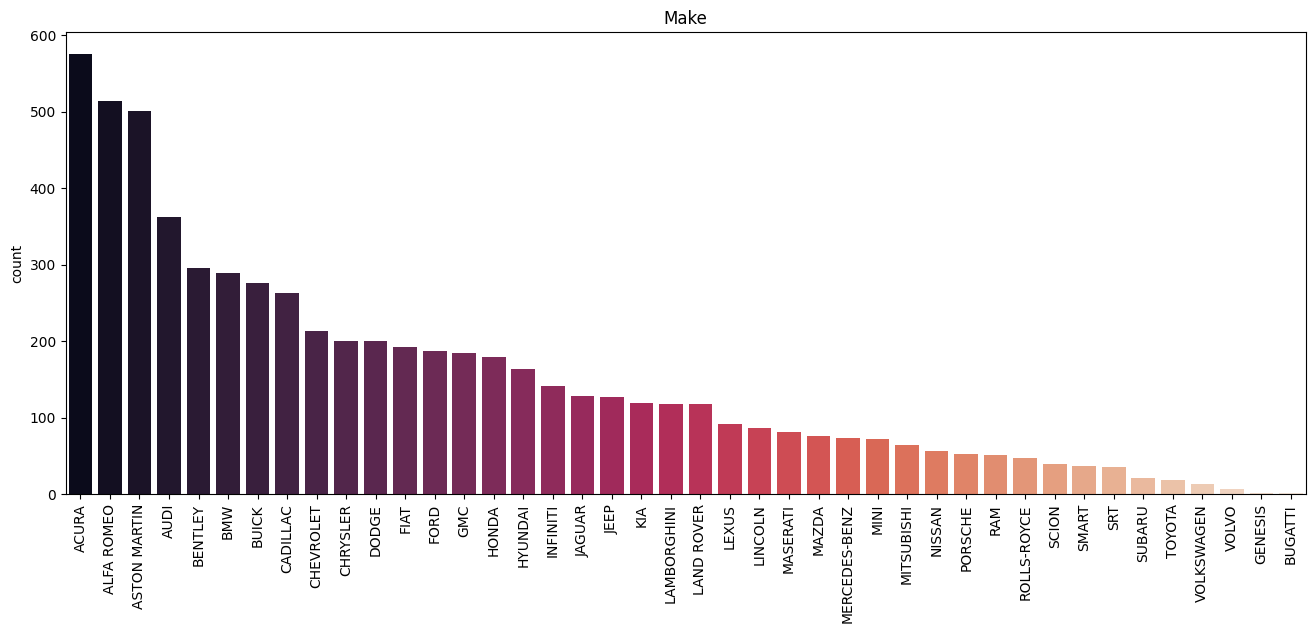

In [ ]:
x = df['make'].unique()
y = df['make'].value_counts()

plt.figure(figsize=(16,6))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.xticks(rotation=90)
plt.title("Make")

<ipython-input-18-f4b57cdce916>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='vehicle_class', palette='rocket')


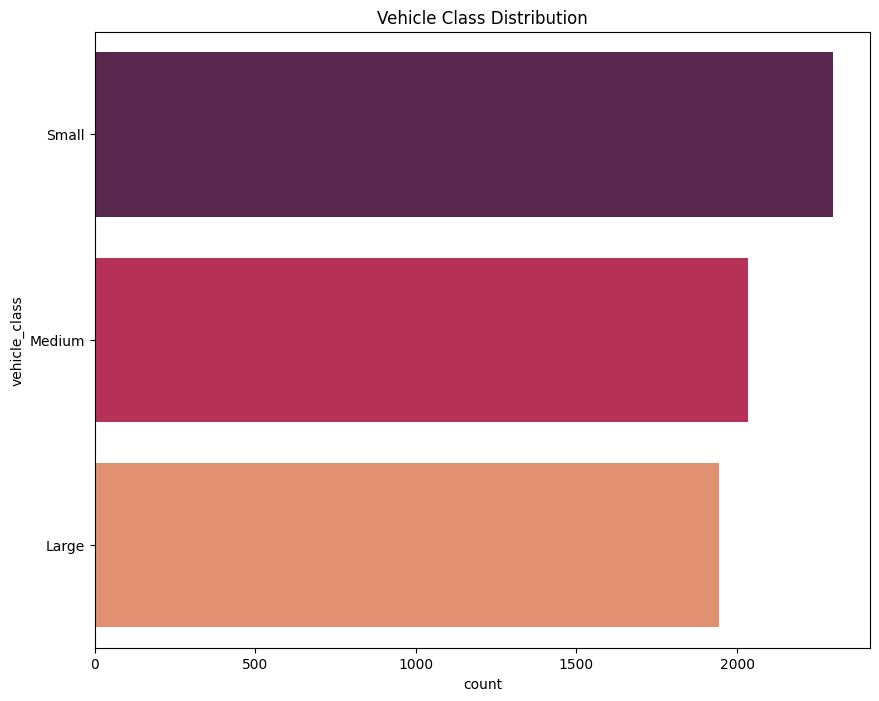

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='vehicle_class', palette='rocket')
plt.title('Vehicle Class Distribution')
plt.show()

Text(0.5, 1.0, 'Fuel type')

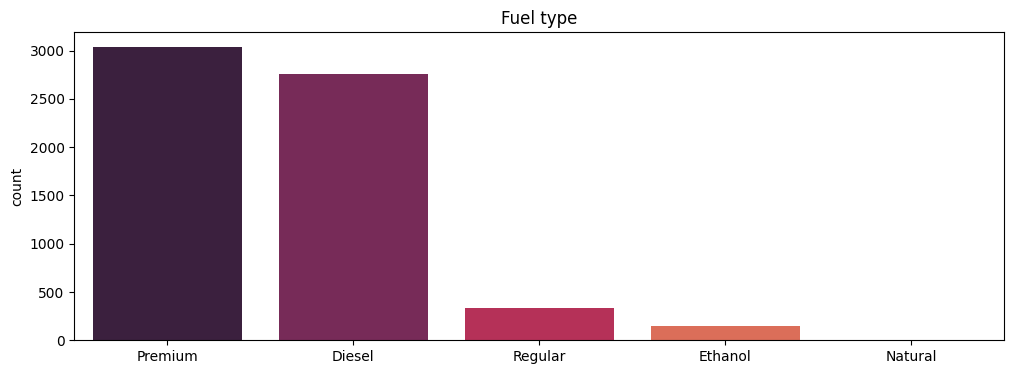

In [ ]:
x = df['fuel_type'].unique()
y = df['fuel_type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.title("Fuel type")

<ipython-input-20-b2bf79be33e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='transmission', palette='rocket')


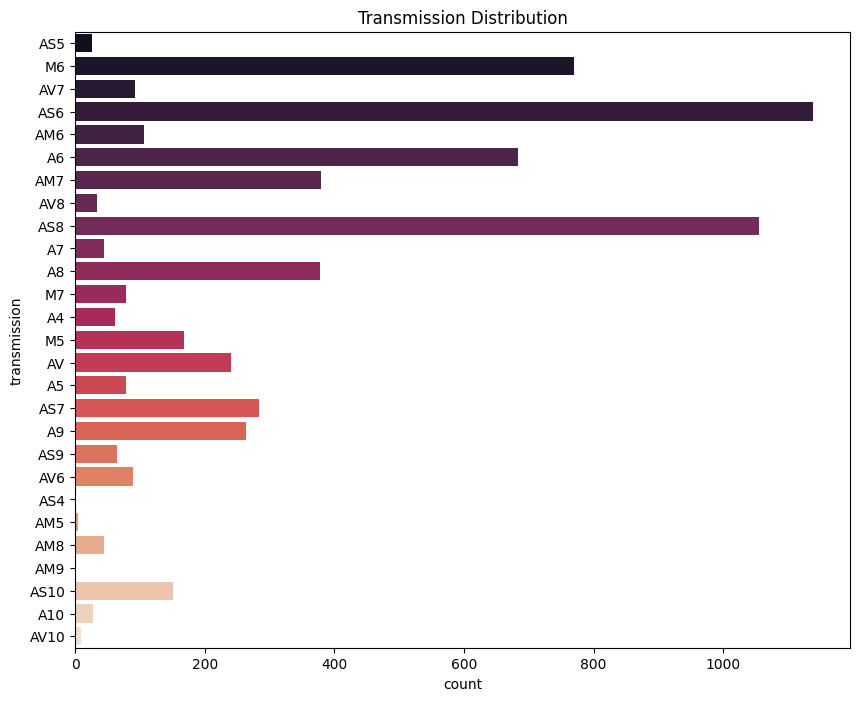

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='transmission', palette='rocket')
plt.title('Transmission Distribution')
plt.show()

Text(0.5, 1.0, 'engine Size')

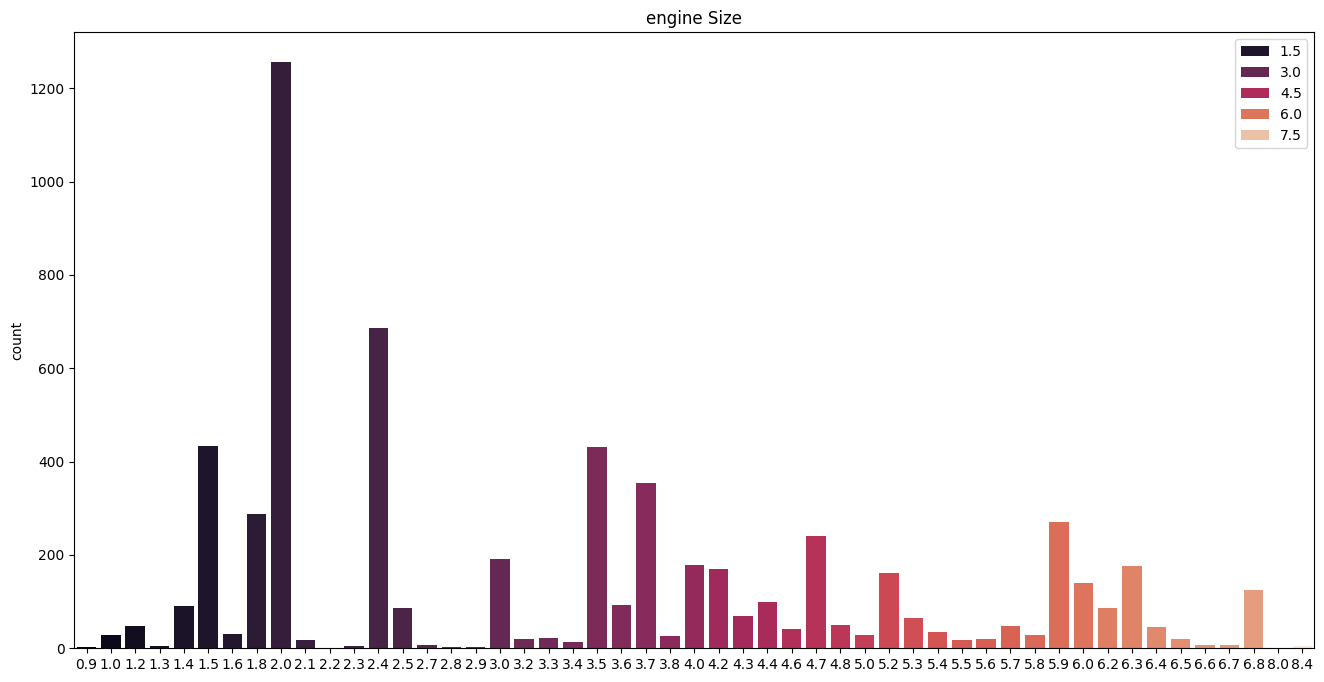

In [ ]:
x = df['engine_size'].unique()
y = df['engine_size'].value_counts()

plt.figure(figsize=(16,8))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.title("engine Size")

Text(0.5, 1.0, 'Cylinders Distribution')

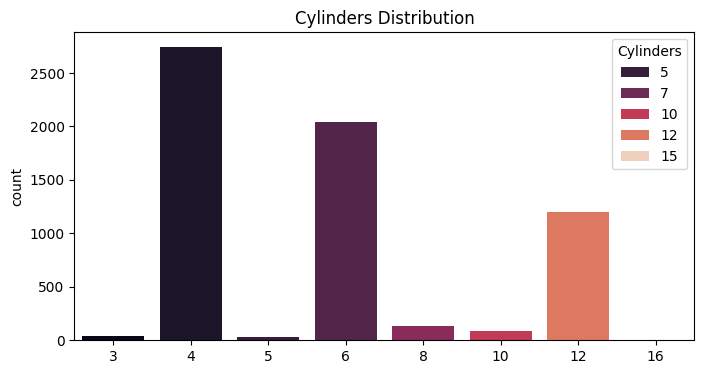

In [ ]:
x = df['cylinders'].unique()
y = df['cylinders'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=x, y=y, palette="rocket", hue=x, legend=True)
plt.legend(title="Cylinders")
plt.title("Cylinders Distribution")

**CONCLUSION**

We can conclude that, from all the categorical features,

1. The use of fuels of diesel (D), ethanol (E), and natural gas (N) fuel in cars are very small compared to regular gas (X) and premium gas (Z)
2. Widespread use of AS6, AS8, M6, A6, A9 as transmission options
3. 4, 6, 8 sizes are the most used cylinders
4. Engine Size with 2.0 and 3.0 are the most common
5. Data is dominated by small vehicles (SUV-SMALL, MID-SIZE)

### Distribution of numerical values

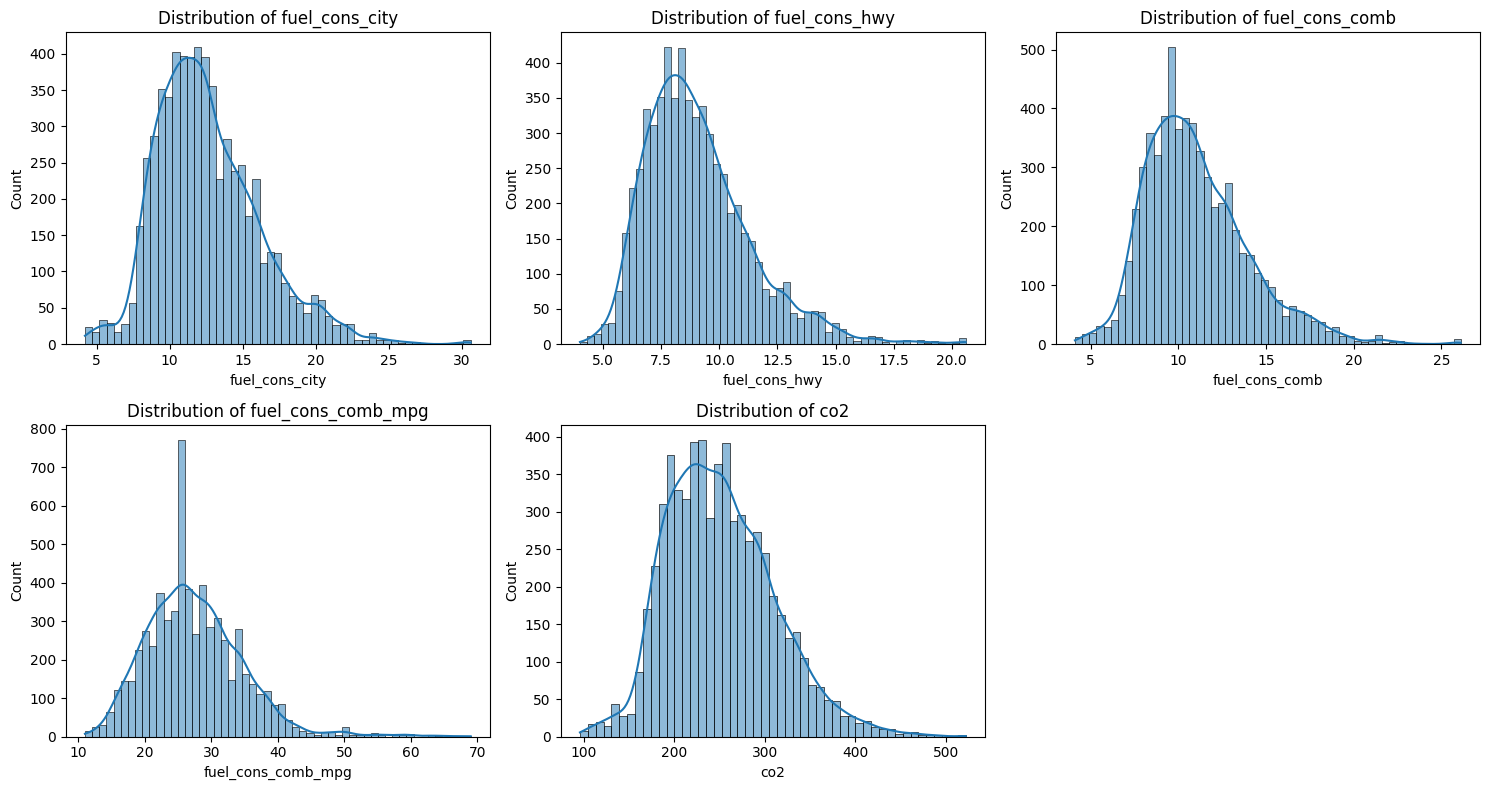

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
numerical_cols = [col for col in numerical_df.columns if col not in ['engine_size', 'cylinders']]

plt.figure(figsize=(15, 8))
num_vars = len(numerical_cols)

for i, var in enumerate(numerical_cols, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

### Distribution of CO2 Emissions in Canada

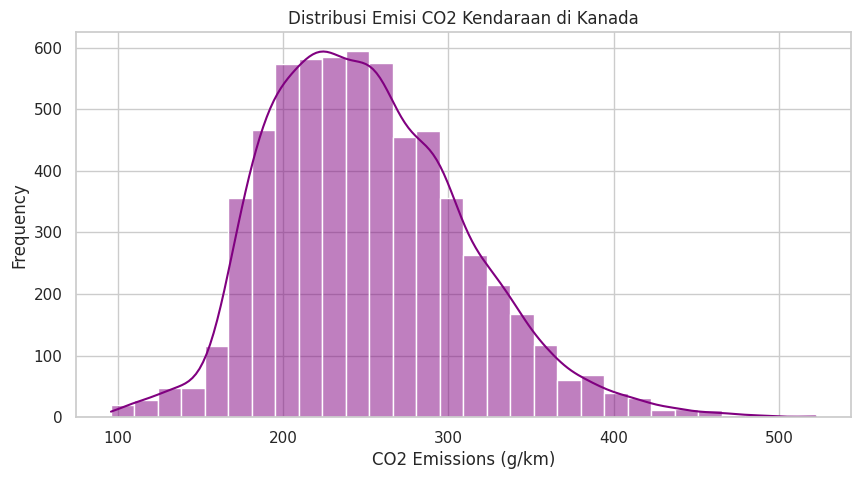

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["co2"], bins=30, kde=True, color="purple")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.title("Distribusi Emisi CO2 Kendaraan di Kanada")
plt.show()

### Distributions of Fuel Consumption by City

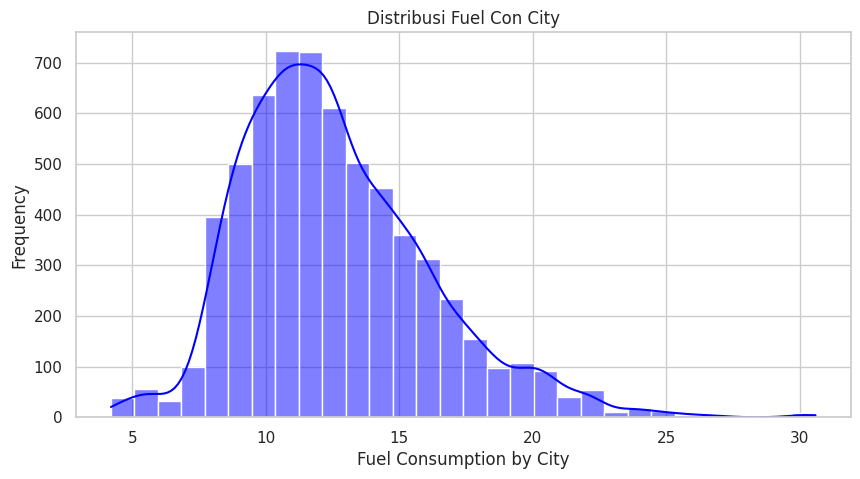

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_city"], bins=30, kde=True, color="blue")
plt.xlabel("Fuel Consumption by City")
plt.ylabel("Frequency")
plt.title("Distribusi Fuel Con City")
plt.show()

### Distributioin of Fuel Consumption by Highway

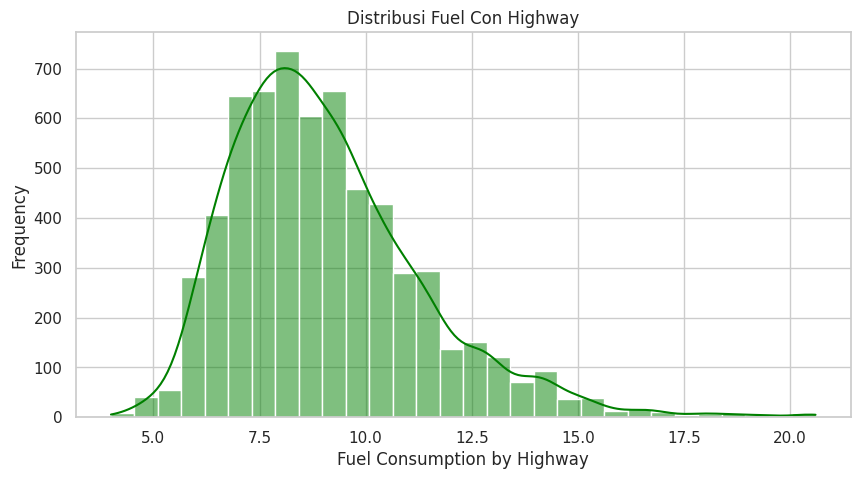

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_hwy"], bins=30, kde=True, color="green")
plt.xlabel("Fuel Consumption by Highway")
plt.ylabel("Frequency")
plt.title("Distribusi Fuel Con Highway")
plt.show()

### Distribution of Fuel Consumption by Comb

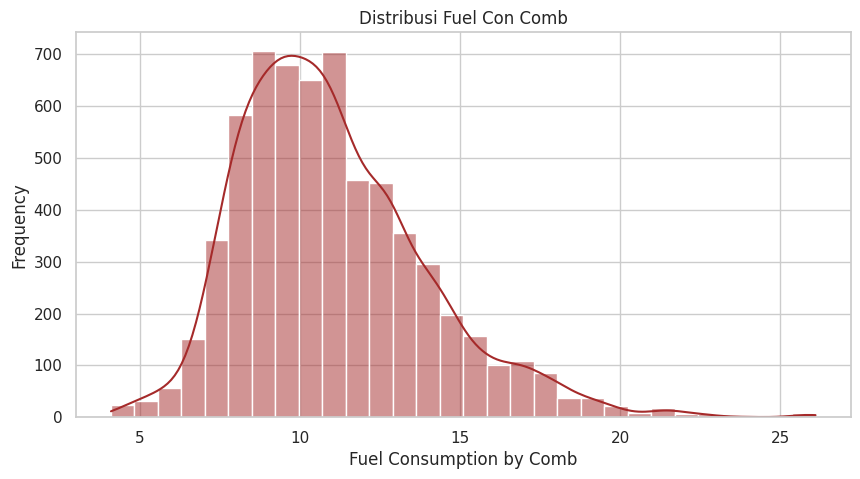

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_comb"], bins=30, kde=True, color="brown")
plt.xlabel("Fuel Consumption by Comb")
plt.ylabel("Frequency")
plt.title("Distribusi Fuel Con Comb")
plt.show()

### Distribution of MPG Fuel Consumption by Comb

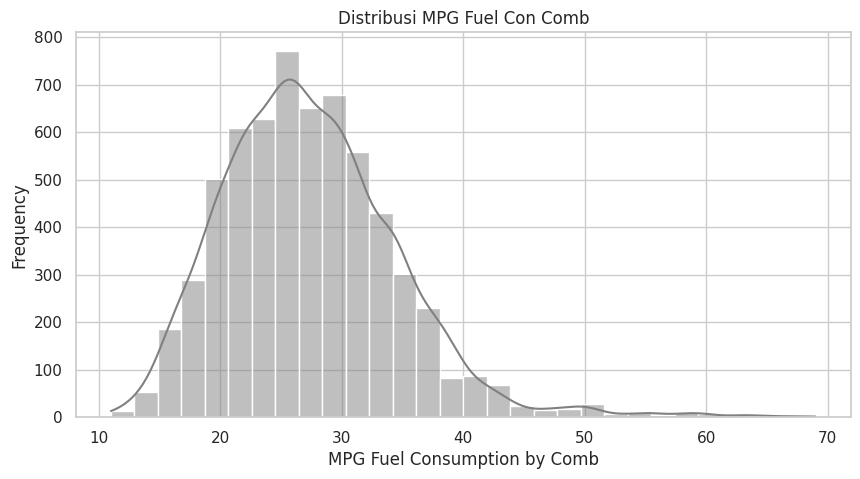

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_cons_comb_mpg"], bins=30, kde=True, color="grey")
plt.xlabel("MPG Fuel Consumption by Comb")
plt.ylabel("Frequency")
plt.title("Distribusi MPG Fuel Con Comb")
plt.show()

In [ ]:
df['fuel_cons_hwy'].mean()

9.072068196303379

In [ ]:
df['fuel_cons_comb'].mean()

11.019741873804971

In [ ]:
df.shape

(6276, 12)

## **Bivariate (Coorelation between Numerical values)**

Text(0.5, 1.05, 'Feature Correlation')

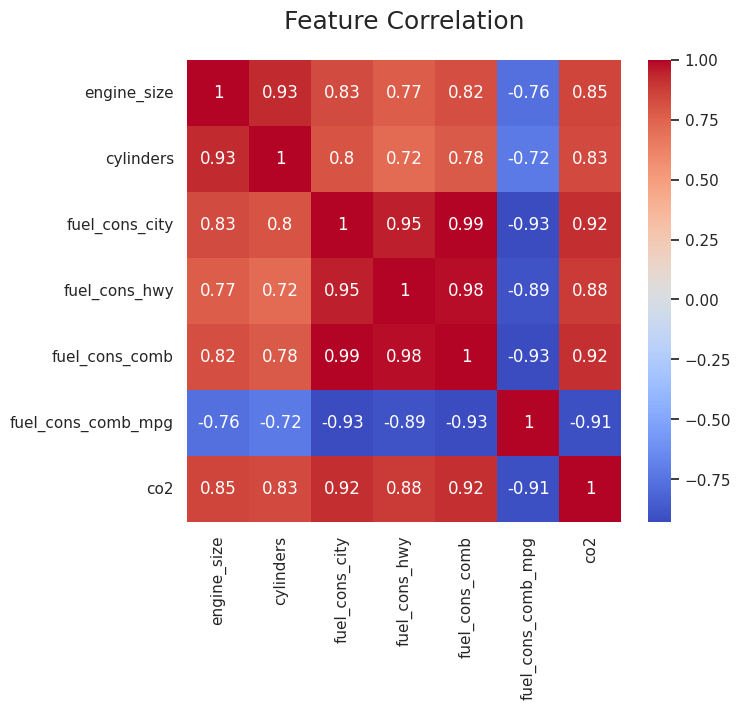

In [ ]:
plt.figure(figsize=(7,6))
num_feature = df.select_dtypes(include=['number'])
sns.heatmap(num_feature.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation', fontsize=18, y=1.05)

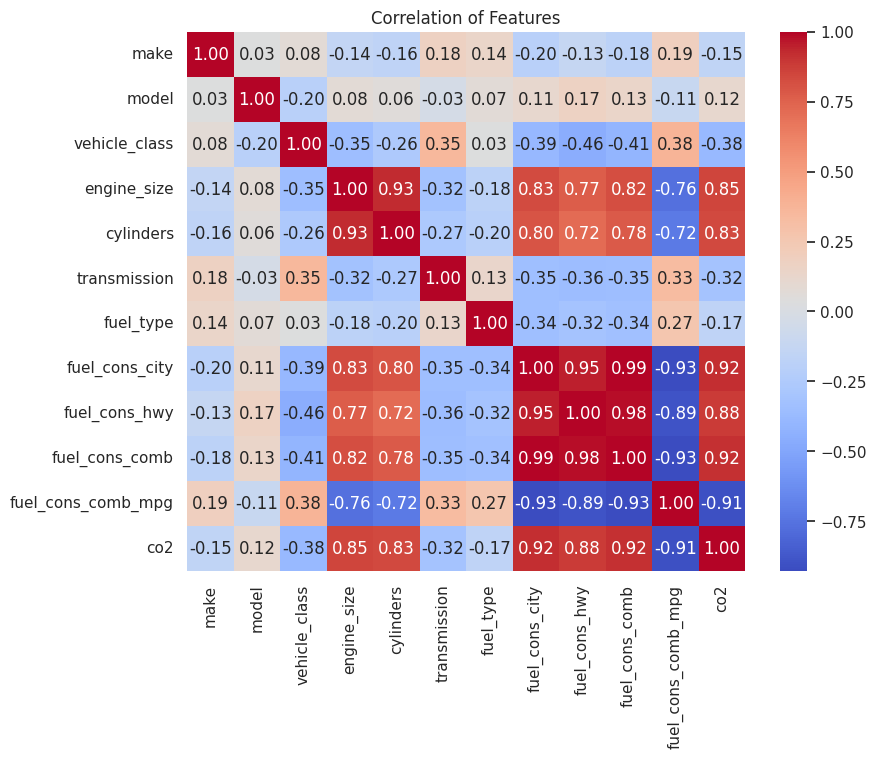

In [ ]:
# Correlation with Label Encoding
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']):
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

plt.figure(figsize=(9, 7))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features')
plt.show()

### Which Model emits most CO2?

<ipython-input-193-08b58a5ded64>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_co2_by_brands = df.groupby("model")["co2"].mean().sort_values(ascending=False).head(5)


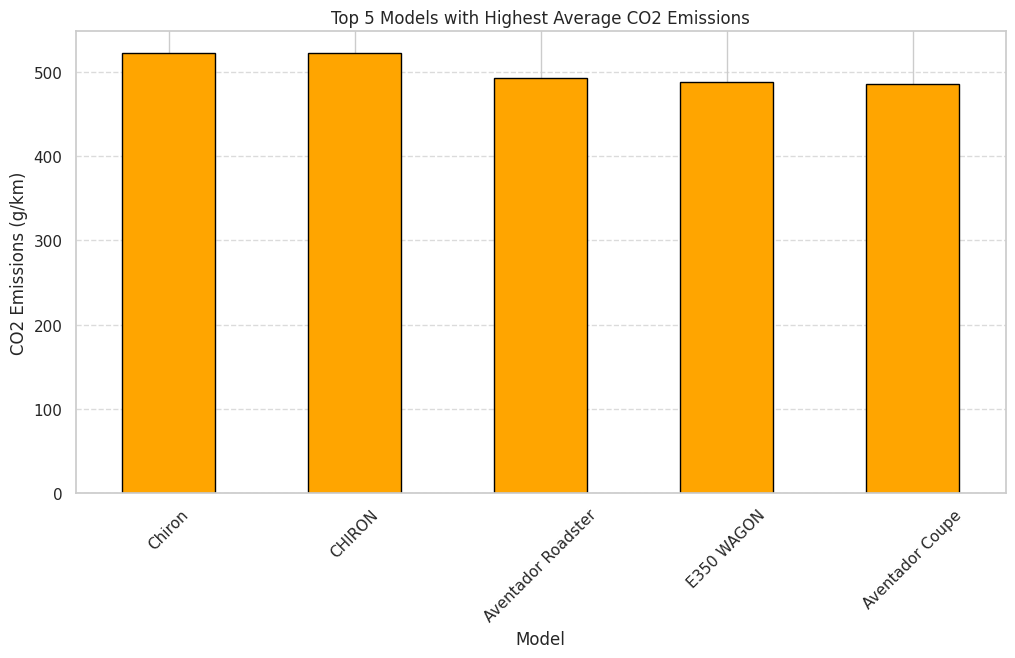

In [193]:
avg_co2_by_brands = df.groupby("model")["co2"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(12,6))
avg_co2_by_brands.plot(kind="bar", color='orange', edgecolor='black')

plt.title("Top 5 Models with Highest Average CO2 Emissions")
plt.xlabel("Model")
plt.ylabel("CO2 Emissions (g/km)")

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### **Which Make emits the most CO2?**

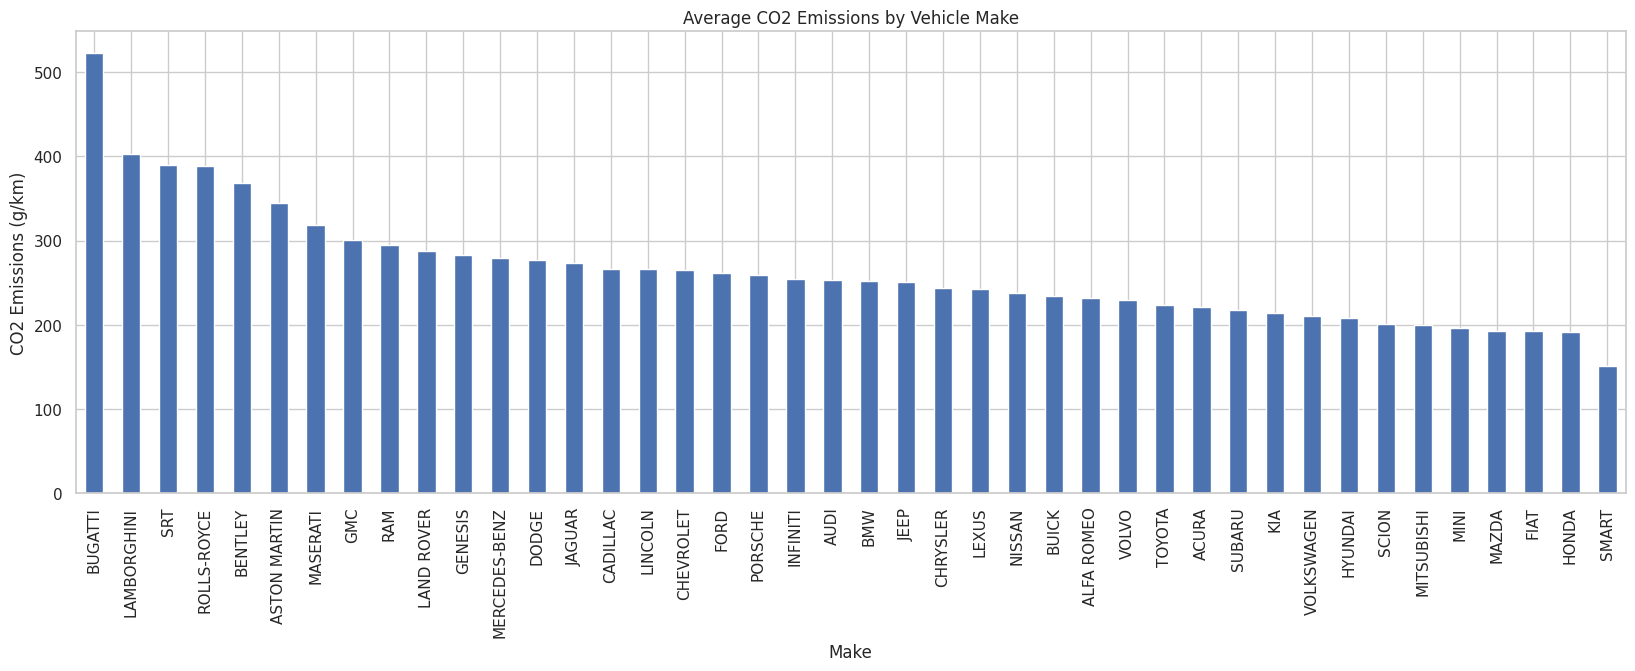

In [ ]:
avg_co2_by_brands = df.groupby("make")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(20,6))
avg_co2_by_brands.plot(kind="bar")
plt.title("Average CO2 Emissions by Vehicle Make")
plt.xlabel("Make")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

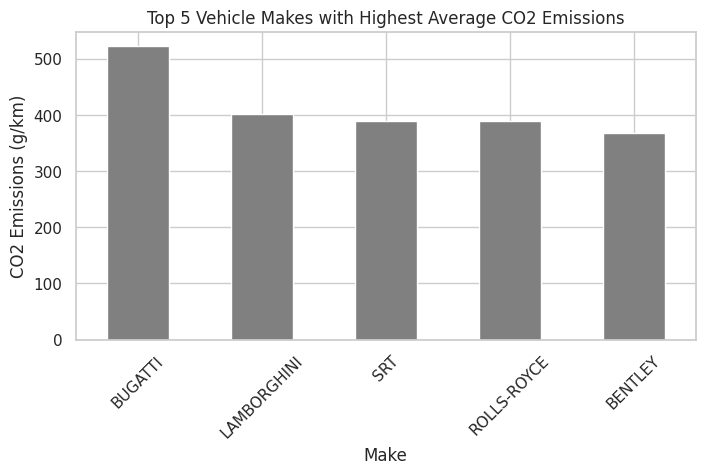

In [ ]:
avg_co2_by_brands = df.groupby("make")["co2"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 4))
avg_co2_by_brands.plot(kind="bar", color="grey")
plt.title("Top 5 Vehicle Makes with Highest Average CO2 Emissions")
plt.xlabel("Make")
plt.ylabel("CO2 Emissions (g/km)")
plt.xticks(rotation=45)
plt.show()

### Which Engine size emits the most CO2?

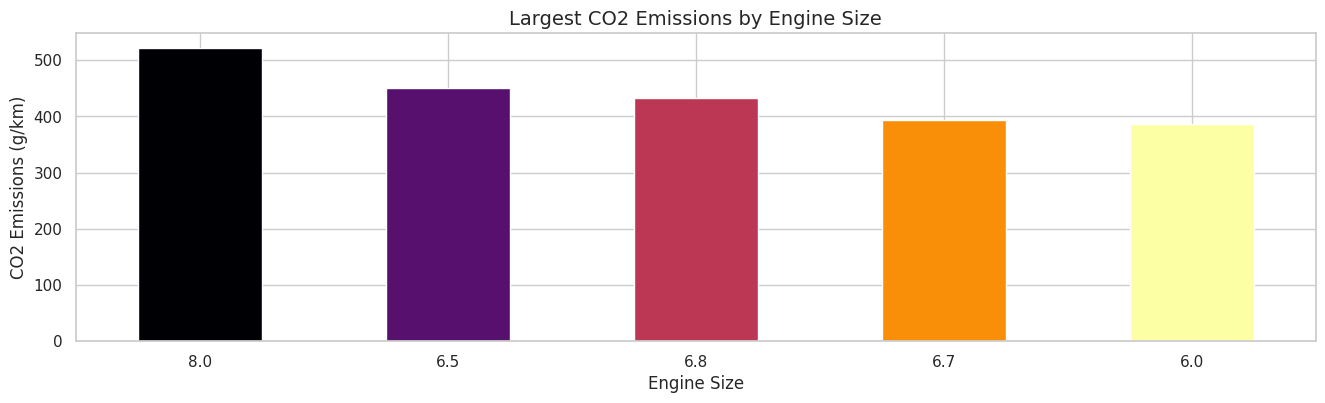

In [ ]:
avg_co2_by_engine = df.groupby("engine_size")["co2"].mean().sort_values(ascending=False)
top_avg_co2_by_engine = avg_co2_by_engine.nlargest(5)

plt.figure(figsize=(16, 4))
colors = plt.cm.inferno(np.linspace(0, 1, len(top_avg_co2_by_engine)))
top_avg_co2_by_engine.plot(kind="bar", color=colors)

plt.title("Largest CO2 Emissions by Engine Size", fontsize=14)
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("CO2 Emissions (g/km)", fontsize=12)
plt.xticks(rotation=0)

plt.show()

### Which Fuel Type emits the most CO2?

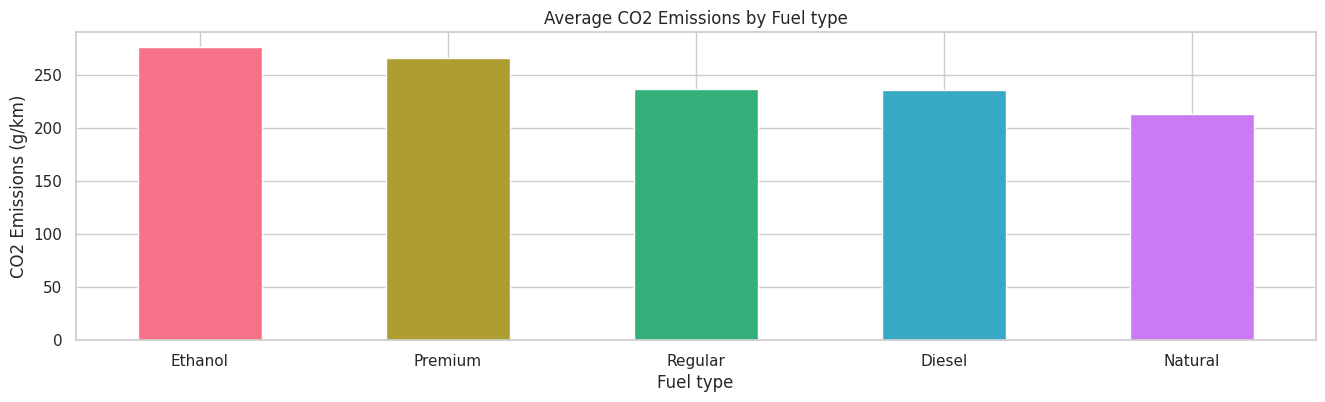

In [ ]:
avg_co2_by_engine = df.groupby("fuel_type")["co2"].mean().sort_values(ascending=False)
fuel_types = avg_co2_by_engine.index
colors = sns.color_palette("husl", len(fuel_types))

plt.figure(figsize=(16,4))
avg_co2_by_engine.plot(kind="bar", color=colors)
plt.title("Average CO2 Emissions by Fuel type")
plt.xlabel("Fuel type")
plt.ylabel("CO2 Emissions (g/km)")
plt.xticks(rotation=0)
plt.show()

### Which Vehicle class emits the most CO2?

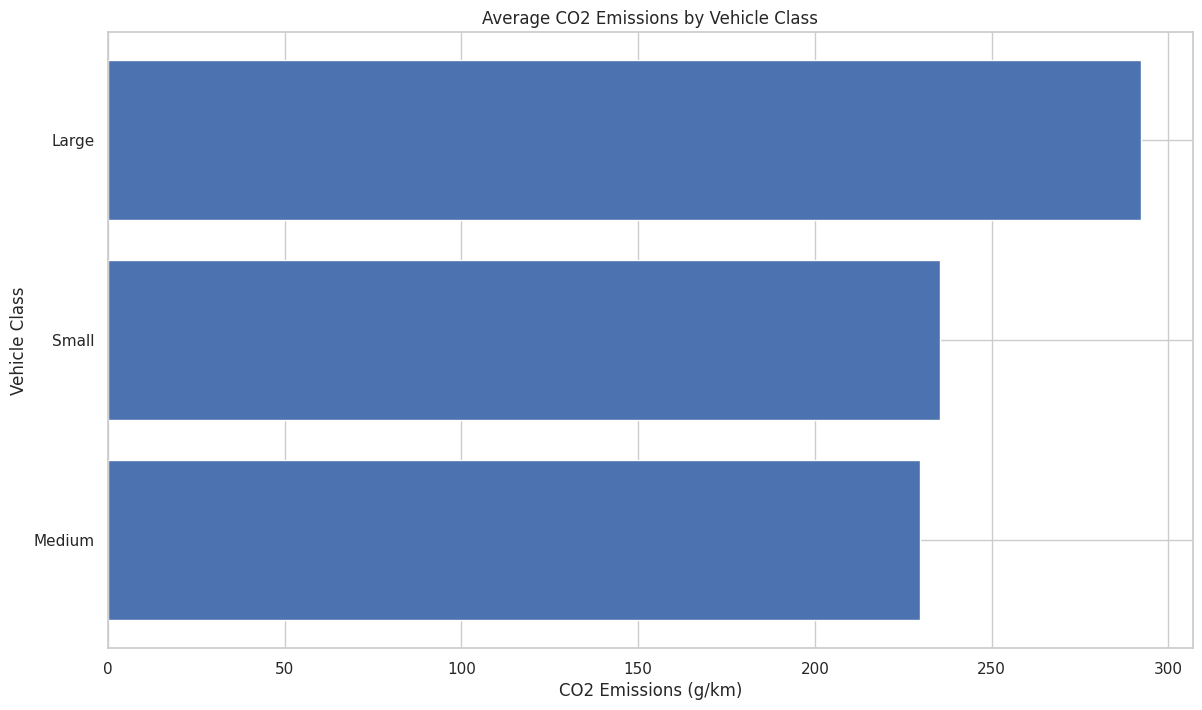

In [ ]:
avg_co2_by_class = df.groupby("vehicle_class")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
plt.barh(avg_co2_by_class.index, avg_co2_by_class.values)
plt.title("Average CO2 Emissions by Vehicle Class")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Vehicle Class")
plt.gca().invert_yaxis()
plt.show()

### Fuel Consumption by City vs CO2

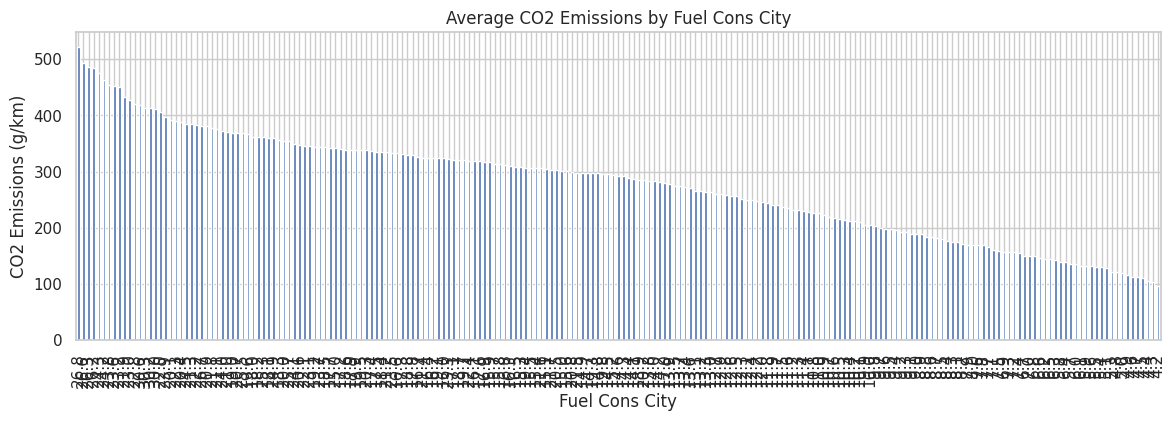

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_city")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by Fuel Cons City")
plt.xlabel("Fuel Cons City")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

###Fuel Consumption by Highway

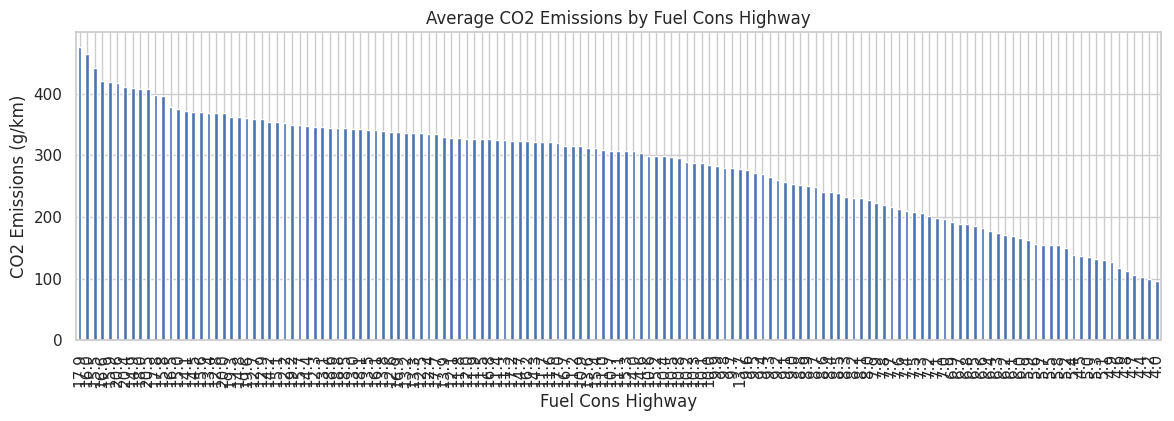

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_hwy")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by Fuel Cons Highway")
plt.xlabel("Fuel Cons Highway")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### Fuel Consumption by Comb

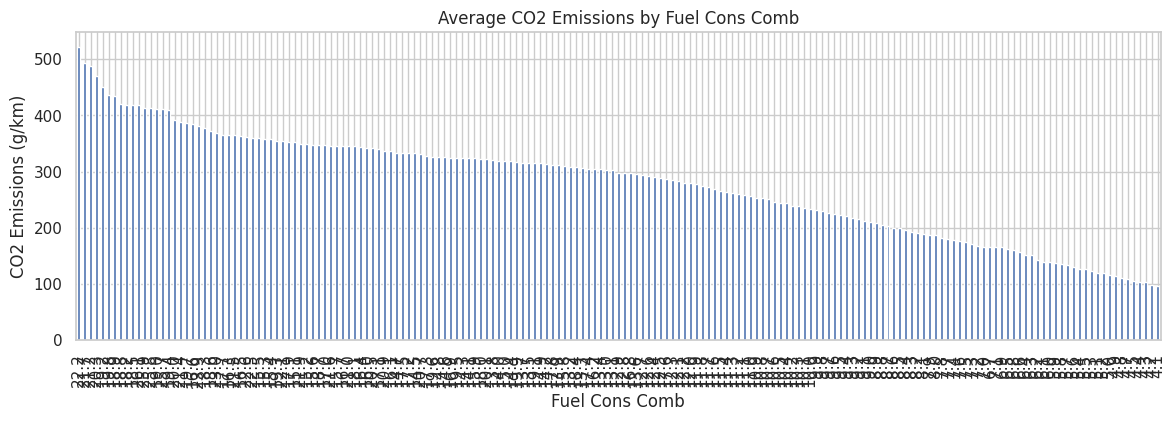

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_comb")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by Fuel Cons Comb")
plt.xlabel("Fuel Cons Comb")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### MPG Fuel Consumption by Comb

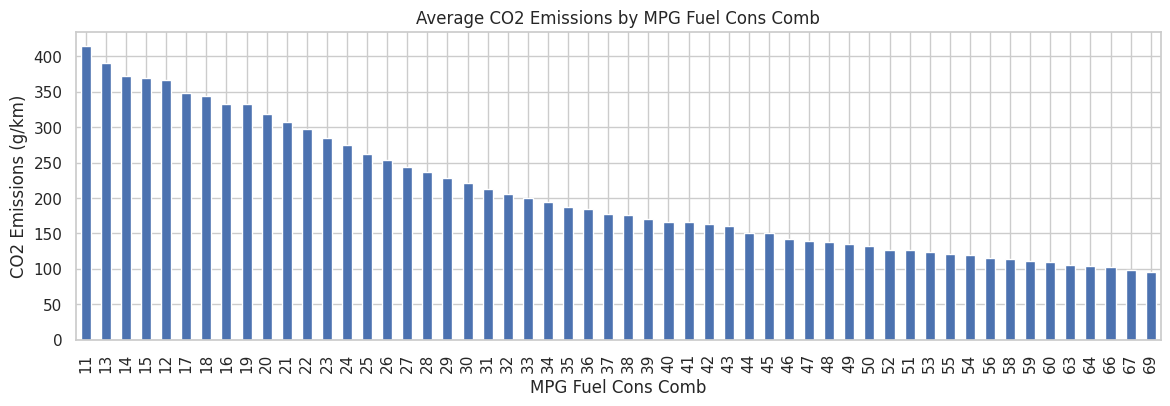

In [ ]:
avg_co2_by_class = df.groupby("fuel_cons_comb_mpg")["co2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,4))
avg_co2_by_class.plot(kind="bar")
plt.title("Average CO2 Emissions by MPG Fuel Cons Comb")
plt.xlabel("MPG Fuel Cons Comb")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### Scatter Plot dari Fuel Consumption antara di Kota, Jalan raya, dan Combination, serta Konsumsi Bahan Bakar

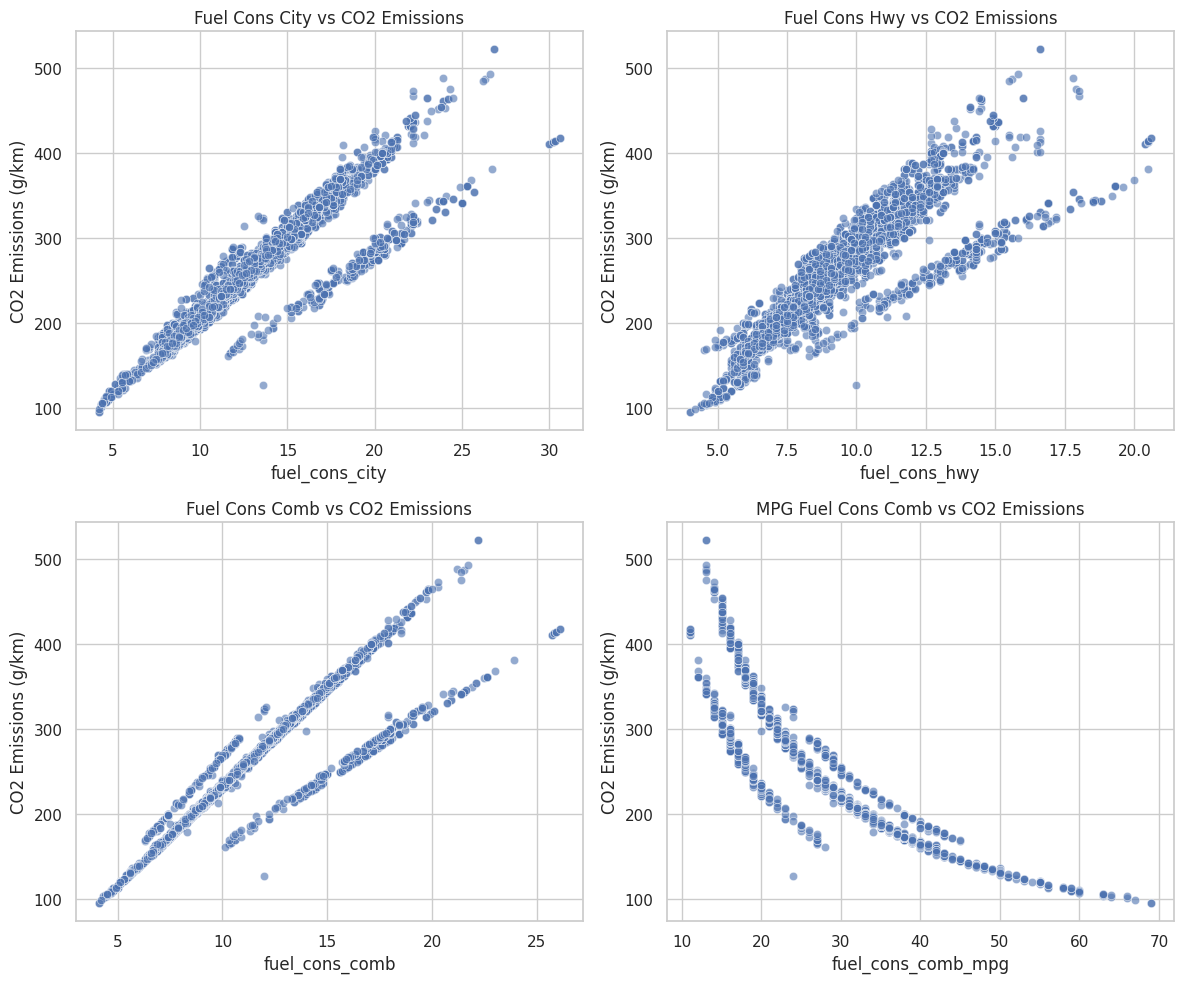

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

features = ['fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb', 'fuel_cons_comb_mpg']
titles = ["Fuel Cons City vs CO2 Emissions",
          "Fuel Cons Hwy vs CO2 Emissions",
          "Fuel Cons Comb vs CO2 Emissions",
          "MPG Fuel Cons Comb vs CO2 Emissions"]

for ax, feature, title in zip(axes.flatten(), features, titles):
    sns.scatterplot(data=df, x=feature, y='co2', alpha=0.6, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("CO2 Emissions (g/km)")
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
df['fuel_cons_city'].mean()

12.612396430847673

## Chi Square Correlation

In [ ]:
from itertools import combinations
import scipy.stats as stats

categorical_columns = ['make', 'model', 'transmission', 'vehicle_class']
target = "co2"

for col in categorical_columns:
    df[col] = df[col].astype("category")

results = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    results[col] = {"Chi2": chi2, "p-value": p}

results_df = pd.DataFrame(results).T
print(results_df)

                        Chi2        p-value
make            40493.567995   0.000000e+00
model          788146.479741   0.000000e+00
transmission    19053.547889   0.000000e+00
vehicle_class    2657.569887  5.292598e-237


In [ ]:
categorical_features = ['make', 'model', 'transmission', 'vehicle_class', 'fuel_type']
chi2_results = {}

for feature1, feature2 in combinations(categorical_features, 2):
    contingency_table = pd.crosstab(df[feature1], df[feature2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi2_results[(feature1, feature2)] = {'Chi-Square': chi2, 'p-value': p, 'degrees_of_freedom': dof}

chi2_df = pd.DataFrame(chi2_results).T
print("Chi-Square Test Results for Categorical Feature Pairs:")
chi2_df

Chi-Square Test Results for Categorical Feature Pairs:


Chi-Square        p-value  degrees_of_freedom
make          model          257316.000000   0.000000e+00             84132.0
              transmission    28999.501964   0.000000e+00              1066.0
              vehicle_class    2956.402358   0.000000e+00                82.0
              fuel_type        5255.636361   0.000000e+00               164.0
model         transmission   107628.615590   0.000000e+00             53352.0
              vehicle_class   12265.315885   0.000000e+00              4104.0
              fuel_type       16379.522075   0.000000e+00              8208.0
transmission  vehicle_class    2368.355205   0.000000e+00                52.0
              fuel_type        3310.831432   0.000000e+00               104.0
vehicle_class fuel_type        1103.750948  5.932832e-233                 8.0

# Preprocessing

## Finding Outliers

### Using IQR

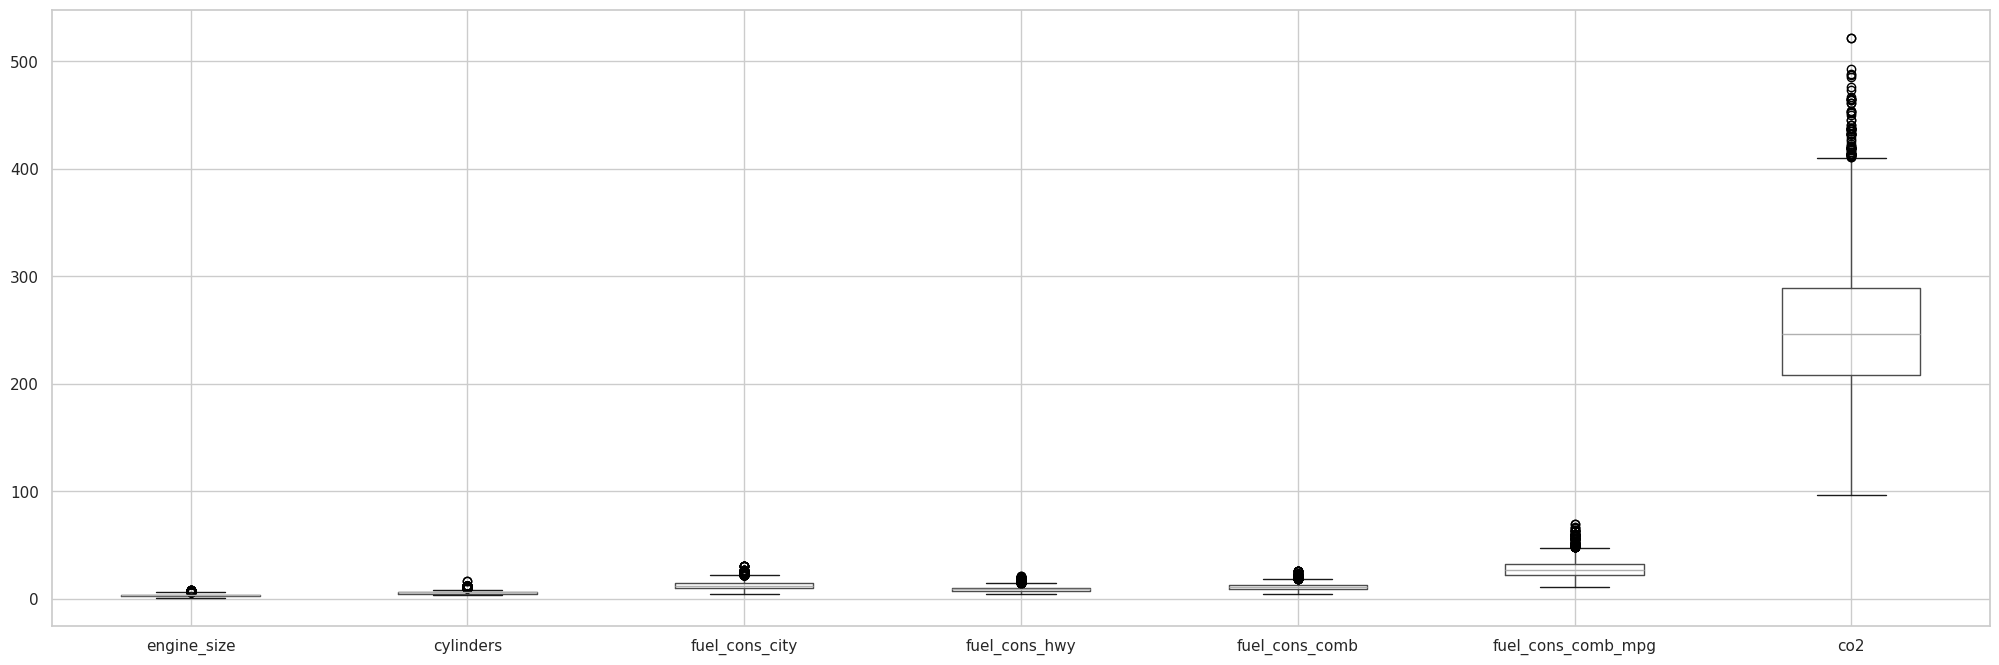

In [ ]:
plt.figure(figsize=(25,8))
df.boxplot()
plt.show()

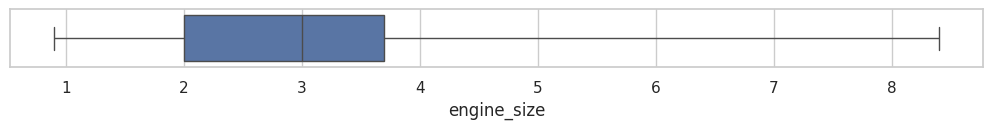

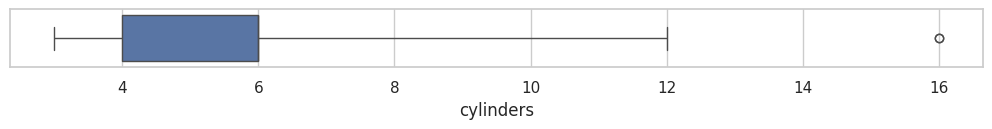

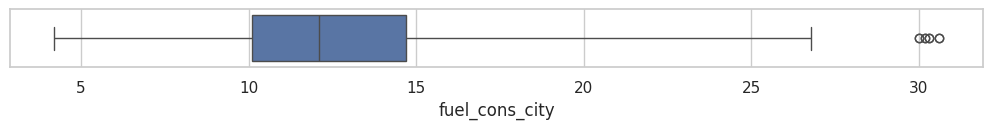

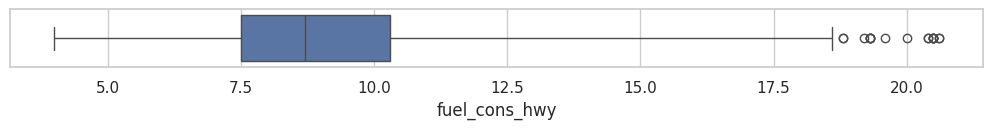

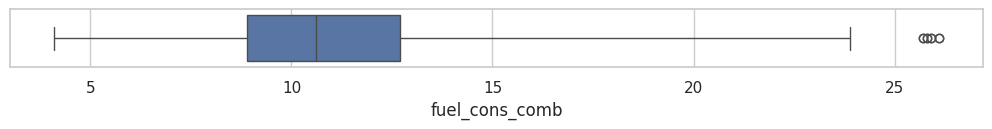

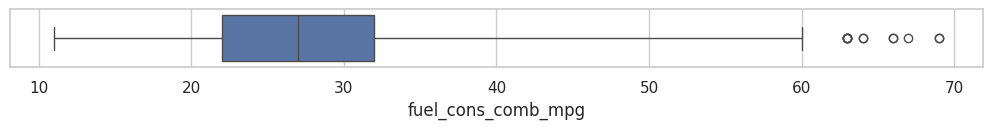

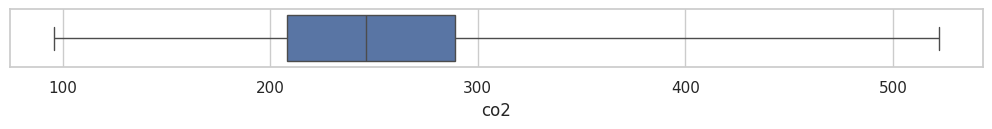

In [ ]:
index=0

for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(20,15))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3)

    plt.tight_layout()

    plt.show()

####  Outlier Cylinders

In [ ]:
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)

(Q1,Q3)

(4.0, 6.0)

In [ ]:
IQR = Q3-Q1
IQR

2.0

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR
(batas_bawah, batas_atas)

(1.0, 9.0)

In [149]:
# outlier dari cylinders

outliers = df[ (df['cylinders']< batas_bawah) | (df['cylinders']> batas_atas) ]
outliers

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,Vehicle Class Encoded
0,ACURA,ILX,Small,2.0,4,AS5,Premium,9.9,6.7,8.5,33,196,0
1,ACURA,ILX,Small,2.4,4,M6,Premium,11.2,7.7,9.6,29,221,0
2,ACURA,ILX HYBRID,Small,1.5,4,AV7,Premium,6.0,5.8,5.9,48,136,0
3,ACURA,MDX 4WD,Medium,3.5,6,AS6,Premium,12.7,9.1,11.1,25,255,1
4,ACURA,RDX AWD,Medium,3.5,6,AS6,Premium,12.1,8.7,10.6,27,244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,Medium,2.0,4,AS8,Premium,10.7,7.7,9.4,30,219,1
7381,VOLVO,XC60 T5 AWD,Medium,2.0,4,AS8,Premium,11.2,8.3,9.9,29,232,1
7382,VOLVO,XC60 T6 AWD,Medium,2.0,4,AS8,Premium,11.7,8.6,10.3,27,240,1
7383,VOLVO,XC90 T5 AWD,Large,2.0,4,AS8,Premium,11.2,8.3,9.9,29,232,2


In [151]:
#random_outlier = outliers.sample(n=1, random_state=122)
#random_outlier

In [156]:
df['cylinders'].describe()

,cylinders
count,6276.000000
mean,5.619822
std,1.846323
min,3.000000
25%,4.000000
50%,6.000000
75%,6.000000
max,16.000000


In [159]:
outliers_atas = df[df['cylinders'] > 9]
outliers_atas

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,Vehicle Class Encoded
13,ASTON MARTIN,DB9,Small,5.9,12,A6,Premium,18.0,12.6,15.6,18,359,0
14,ASTON MARTIN,RAPIDE,Small,5.9,12,A6,Premium,18.0,12.6,15.6,18,359,0
19,ASTON MARTIN,VANQUISH,Small,5.9,12,A6,Premium,18.0,12.6,15.6,18,359,0
36,AUDI,A8L,Large,6.3,12,AS8,Premium,18.7,11.5,15.5,18,363,2
47,AUDI,R8,Small,5.2,10,A7,Premium,18.2,10.6,14.8,19,347,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,ROLLS-ROYCE,Cullinan Black Badge,Medium,6.7,12,AS8,Premium,20.1,12.1,16.5,17,386,1
7287,ROLLS-ROYCE,Dawn,Small,6.6,12,AS8,Premium,20.4,13.1,17.1,17,400,0
7288,ROLLS-ROYCE,Ghost,Large,6.6,12,AS8,Premium,20.4,13.1,17.1,17,400,2
7289,ROLLS-ROYCE,Ghost EWB,Large,6.6,12,AS8,Premium,20.4,13.1,17.1,17,400,2


####  Outlier Engine Size

In [ ]:
Q1 = df['engine_size'].quantile(0.25)
Q3 = df['engine_size'].quantile(0.75)
Q1,Q3

(2.0, 3.7)

In [ ]:
IQR = Q3-Q1
IQR

1.7000000000000002

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(-0.5500000000000003, 6.25)

In [ ]:
# outlier dari engine_size

df[ (df['engine_size']<batas_bawah) | (df['engine_size']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
36,AUDI,A8L,Large,6.3,12,AS8,Premium,18.7,11.5,15.5,18,363
75,BENTLEY,MULSANNE,Medium,6.8,8,AS8,Premium,22.3,14.9,19.0,15,437
290,CHRYSLER,300 SRT (MDS),Large,6.4,8,A5,Premium,16.7,10.3,13.8,20,317
300,DODGE,CHALLENGER SRT,Medium,6.4,8,M6,Premium,16.8,10.4,13.9,20,320
301,DODGE,CHALLENGER SRT (MDS),Medium,6.4,8,A5,Premium,16.7,10.3,13.8,20,317
...,...,...,...,...,...,...,...,...,...,...,...,...
7286,ROLLS-ROYCE,Cullinan Black Badge,Medium,6.7,12,AS8,Premium,20.1,12.1,16.5,17,386
7287,ROLLS-ROYCE,Dawn,Small,6.6,12,AS8,Premium,20.4,13.1,17.1,17,400
7288,ROLLS-ROYCE,Ghost,Large,6.6,12,AS8,Premium,20.4,13.1,17.1,17,400
7289,ROLLS-ROYCE,Ghost EWB,Large,6.6,12,AS8,Premium,20.4,13.1,17.1,17,400


In [160]:
outliers_atas = df[df['engine_size'] > 6.25]
outliers_atas

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,Vehicle Class Encoded
36,AUDI,A8L,Large,6.3,12,AS8,Premium,18.7,11.5,15.5,18,363,2
75,BENTLEY,MULSANNE,Medium,6.8,8,AS8,Premium,22.3,14.9,19.0,15,437,1
290,CHRYSLER,300 SRT (MDS),Large,6.4,8,A5,Premium,16.7,10.3,13.8,20,317,2
300,DODGE,CHALLENGER SRT,Medium,6.4,8,M6,Premium,16.8,10.4,13.9,20,320,1
301,DODGE,CHALLENGER SRT (MDS),Medium,6.4,8,A5,Premium,16.7,10.3,13.8,20,317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,ROLLS-ROYCE,Cullinan Black Badge,Medium,6.7,12,AS8,Premium,20.1,12.1,16.5,17,386,1
7287,ROLLS-ROYCE,Dawn,Small,6.6,12,AS8,Premium,20.4,13.1,17.1,17,400,0
7288,ROLLS-ROYCE,Ghost,Large,6.6,12,AS8,Premium,20.4,13.1,17.1,17,400,2
7289,ROLLS-ROYCE,Ghost EWB,Large,6.6,12,AS8,Premium,20.4,13.1,17.1,17,400,2


#### Outlier Fuel Consumption City

In [ ]:
Q1 = df['fuel_cons_city'].quantile(0.25)
Q3 = df['fuel_cons_city'].quantile(0.75)
Q1,Q3

(10.1, 14.7)

In [ ]:
IQR = Q3-Q1
IQR

4.6

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(3.2, 21.599999999999998)

In [ ]:
# outlier dari fuel_cons_city

df[ (df['fuel_cons_city']<batas_bawah) | (df['fuel_cons_city']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
75,BENTLEY,MULSANNE,Medium,6.8,8,AS8,Premium,22.3,14.9,19.0,15,437
180,CADILLAC,ESCALADE AWD,Large,6.2,8,A6,Ethanol,23.3,16.1,20.1,14,322
182,CADILLAC,ESCALADE ESV AWD,Large,6.2,8,A6,Ethanol,25.7,17.8,22.1,13,354
212,CHEVROLET,EXPRESS 1500 CARGO,Large,5.3,8,A4,Ethanol,23.5,17.7,20.9,14,334
214,CHEVROLET,EXPRESS 1500 CARGO AWD,Large,5.3,8,A4,Ethanol,23.7,18.8,21.5,13,344
...,...,...,...,...,...,...,...,...,...,...,...,...
6836,FORD,T-150 Wagon FFV 4WD,Large,3.5,6,AS10,Ethanol,22.1,16.8,19.8,14,328
6870,GMC,Sierra FFV,Large,5.3,8,A6,Ethanol,22.2,16.2,19.5,14,326
6879,GMC,Sierra 4WD FFV,Large,5.3,8,A6,Ethanol,21.8,16.8,19.5,14,325
6902,GMC,Yukon XL 4WD FFV,Large,5.3,8,A6,Ethanol,22.2,15.3,19.1,15,319


#### Outlier Fuel Consumption Highway

In [ ]:
Q1 = df['fuel_cons_hwy'].quantile(0.25)
Q3 = df['fuel_cons_hwy'].quantile(0.75)
Q1,Q3

(7.5, 10.3)

In [ ]:
IQR = Q3-Q1
IQR

2.8000000000000007

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR
(batas_bawah, batas_atas)

(3.299999999999999, 14.500000000000002)

In [ ]:
# outlier dari fuel_cons_hwy

df[ (df['fuel_cons_hwy']<batas_bawah) | (df['fuel_cons_hwy']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
75,BENTLEY,MULSANNE,Medium,6.8,8,AS8,Premium,22.3,14.9,19.0,15,437
180,CADILLAC,ESCALADE AWD,Large,6.2,8,A6,Ethanol,23.3,16.1,20.1,14,322
182,CADILLAC,ESCALADE ESV AWD,Large,6.2,8,A6,Ethanol,25.7,17.8,22.1,13,354
212,CHEVROLET,EXPRESS 1500 CARGO,Large,5.3,8,A4,Ethanol,23.5,17.7,20.9,14,334
214,CHEVROLET,EXPRESS 1500 CARGO AWD,Large,5.3,8,A4,Ethanol,23.7,18.8,21.5,13,344
...,...,...,...,...,...,...,...,...,...,...,...,...
6836,FORD,T-150 Wagon FFV 4WD,Large,3.5,6,AS10,Ethanol,22.1,16.8,19.8,14,328
6870,GMC,Sierra FFV,Large,5.3,8,A6,Ethanol,22.2,16.2,19.5,14,326
6879,GMC,Sierra 4WD FFV,Large,5.3,8,A6,Ethanol,21.8,16.8,19.5,14,325
6902,GMC,Yukon XL 4WD FFV,Large,5.3,8,A6,Ethanol,22.2,15.3,19.1,15,319


#### Outlier dari Fuel Consumption Comb

In [ ]:
Q1 = df['fuel_cons_comb'].quantile(0.25)
Q3 = df['fuel_cons_comb'].quantile(0.75)

Q1, Q3

(8.9, 12.7)

In [ ]:
IQR = Q3-Q1
IQR

3.799999999999999

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(3.200000000000002, 18.4)

In [ ]:
# outlier dari fuel_cons_comb

df[ (df['fuel_cons_comb']<batas_bawah) | (df['fuel_cons_comb']>batas_atas) ]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
75,BENTLEY,MULSANNE,Medium,6.8,8,AS8,Premium,22.3,14.9,19.0,15,437
180,CADILLAC,ESCALADE AWD,Large,6.2,8,A6,Ethanol,23.3,16.1,20.1,14,322
182,CADILLAC,ESCALADE ESV AWD,Large,6.2,8,A6,Ethanol,25.7,17.8,22.1,13,354
212,CHEVROLET,EXPRESS 1500 CARGO,Large,5.3,8,A4,Ethanol,23.5,17.7,20.9,14,334
214,CHEVROLET,EXPRESS 1500 CARGO AWD,Large,5.3,8,A4,Ethanol,23.7,18.8,21.5,13,344
...,...,...,...,...,...,...,...,...,...,...,...,...
6836,FORD,T-150 Wagon FFV 4WD,Large,3.5,6,AS10,Ethanol,22.1,16.8,19.8,14,328
6870,GMC,Sierra FFV,Large,5.3,8,A6,Ethanol,22.2,16.2,19.5,14,326
6879,GMC,Sierra 4WD FFV,Large,5.3,8,A6,Ethanol,21.8,16.8,19.5,14,325
6902,GMC,Yukon XL 4WD FFV,Large,5.3,8,A6,Ethanol,22.2,15.3,19.1,15,319


#### Outlier dari Fuel Consumption Comb (mpg)

In [ ]:
Q1 = df['fuel_cons_comb_mpg'].quantile(0.25)
Q3 = df['fuel_cons_comb_mpg'].quantile(0.75)

(Q1,Q3)

(22.0, 32.0)

In [ ]:
IQR = Q3-Q1
IQR

10.0

In [ ]:
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

(batas_bawah, batas_atas)

(7.0, 47.0)

In [116]:
# outlier dari fuel_cons_comb_mpg

outliers = df[ (df['fuel_cons_comb_mpg']<batas_bawah) | (df['fuel_cons_comb_mpg']>batas_atas) ]
outliers

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,Vehicle Class Encoded
2,ACURA,ILX HYBRID,Small,1.5,4,AV7,Premium,6.0,5.8,5.9,48,136,0
415,FORD,FUSION HYBRID,Medium,2.0,4,AV,Regular,5.3,5.7,5.5,51,126,1
487,HONDA,ACCORD HYBRID,Medium,2.0,4,AV,Regular,4.7,4.9,4.8,59,110,1
659,LEXUS,CT 200h,Small,1.8,4,AV,Regular,5.5,5.8,5.6,50,129,0
975,TOYOTA,CAMRY HYBRID LE,Medium,2.5,4,AV,Regular,5.5,5.9,5.7,50,131,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7119,LINCOLN,MKZ Hybrid,Medium,2.0,4,AV,Regular,5.5,5.7,5.6,50,131,1
7325,TOYOTA,Camry Hybrid LE,Medium,2.5,4,AV,Regular,4.9,4.8,4.9,58,113,1
7326,TOYOTA,Camry Hybrid XLE/SE,Medium,2.5,4,AV,Regular,5.3,5.0,5.1,55,121,1
7335,TOYOTA,Corolla Hybrid,Small,1.8,4,AV,Regular,4.4,4.5,4.5,63,106,0


In [117]:
random_outlier = outliers.sample(n=1, random_state=42)
random_outlier

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,Vehicle Class Encoded
5944,HYUNDAI,Sonata Hybrid,Medium,2.0,4,AM6,Regular,6.0,5.3,5.7,50,135,1


### Outlier (Z Score)

#### Z Score Fuel Cons City

In [ ]:
from scipy import stats
import numpy as np
z_fuelcity = np.abs(stats.zscore(df['fuel_cons_city']))
z_fuelcity

,fuel_cons_city
0,0.763340
1,0.397485
2,1.860902
3,0.024654
4,0.144202
...,...
7380,0.538199
7381,0.397485
7382,0.256772
7383,0.397485


In [ ]:
import numpy as np

threshold_z = 3

z_fuelcity = np.abs(stats.zscore(df['fuel_cons_city']))

outlier_indices = np.where(z_fuelcity > threshold_z)[0]

no_outliers = df[~(z_fuelcity > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6276, 12)
DataFrame Shape (After) Removing Outliers: (6224, 12)


#### Z Score  Cylinders

In [ ]:
from scipy import stats
import numpy as np
z_cyl = np.abs(stats.zscore(df['cylinders']))
z_cyl

,cylinders
0,0.877393
1,0.877393
2,0.877393
3,0.205928
4,0.205928
...,...
7380,0.877393
7381,0.877393
7382,0.877393
7383,0.877393


In [ ]:
import numpy as np

threshold_z = 3

z_cyls = np.abs(stats.zscore(df['cylinders']))

outlier_indices = np.where(z_cyls > threshold_z)[0]

no_outliers = df[~(z_cyls > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6276, 12)
DataFrame Shape (After) Removing Outliers: (6139, 12)


#### Z Score Engine Size

In [ ]:
from scipy import stats
import numpy as np
z_engine = np.abs(stats.zscore(df['engine_size']))
z_engine

,engine_size
0,0.851757
1,0.558649
2,1.218142
3,0.247397
4,0.247397
...,...
7380,0.851757
7381,0.851757
7382,0.851757
7383,0.851757


In [ ]:
import numpy as np

threshold_z = 3

z_engine = np.abs(stats.zscore(df['engine_size']))

outlier_indices = np.where(z_engine > threshold_z)[0]

no_outliers = df[~(z_engine > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6276, 12)
DataFrame Shape (After) Removing Outliers: (6269, 12)


#### Z Score Fuel Cons Highway

In [ ]:
from scipy import stats
import numpy as np
z_fuelhwy = np.abs(stats.zscore(df['fuel_cons_hwy']))
z_fuelhwy

,fuel_cons_hwy
0,1.040791
1,0.602022
2,1.435684
3,0.012256
4,0.163252
...,...
7380,0.602022
7381,0.338760
7382,0.207129
7383,0.338760


In [ ]:
import numpy as np

threshold_z = 3

z_fuelhwy = np.abs(stats.zscore(df['fuel_cons_hwy']))

outlier_indices = np.where(z_fuelhwy > threshold_z)[0]

no_outliers = df[~(z_fuelhwy > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6276, 12)
DataFrame Shape (After) Removing Outliers: (6207, 12)


#### Z Score Fuel Cons Combination

In [ ]:
from scipy import stats
import numpy as np
z_fuelcomb = np.abs(stats.zscore(df['fuel_cons_comb']))
z_fuelcomb

,fuel_cons_comb
0,0.854988
1,0.481741
2,1.737209
3,0.027233
4,0.142425
...,...
7380,0.549604
7381,0.379946
7382,0.244220
7383,0.379946


In [ ]:
import numpy as np

threshold_z = 3

z_fuelcomb = np.abs(stats.zscore(df['fuel_cons_comb']))

outlier_indices = np.where(z_fuelcomb > threshold_z)[0]

no_outliers = df[~(z_fuelcomb > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6276, 12)
DataFrame Shape (After) Removing Outliers: (6225, 12)


#### Z Score MPG Fuel Cons Comb

In [ ]:
from scipy import stats
import numpy as np
z_mpg = np.abs(stats.zscore(df['fuel_cons_comb_mpg']))
z_mpg

,fuel_cons_comb_mpg
0,0.771857
1,0.219830
2,2.841956
3,0.332197
4,0.056183
...,...
7380,0.357837
7381,0.219830
7382,0.056183
7383,0.219830


In [ ]:
import numpy as np

threshold_z = 3

z_mpg = np.abs(stats.zscore(df['fuel_cons_comb_mpg']))

outlier_indices = np.where(z_mpg > threshold_z)[0]

no_outliers = df[~(z_mpg > threshold_z)]

print("DataFrame Shape (Before):", df.shape)
print("DataFrame Shape (After) Removing Outliers:", no_outliers.shape)

DataFrame Shape (Before): (6276, 12)
DataFrame Shape (After) Removing Outliers: (6198, 12)


# Data Encoding

In [ ]:
df_modeling = df.copy()
df_modeling.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,ACURA,ILX,Small,2.0,4,AS5,Premium,9.9,6.7,8.5,33,196
1,ACURA,ILX,Small,2.4,4,M6,Premium,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,Small,1.5,4,AV7,Premium,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,Medium,3.5,6,AS6,Premium,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,Medium,3.5,6,AS6,Premium,12.1,8.7,10.6,27,244


## One Hot Encode

### Fuel Type

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, dtype=int)
encoded = ohe.fit_transform(df_modeling[['fuel_type']])

encoded_fuel = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['fuel_type']))

df_modeling = pd.concat([df_modeling, encoded_fuel], axis=1)
df_modeling.drop(columns=['fuel_type'], inplace=True)

df_modeling.head(5)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,fuel_type_Diesel,fuel_type_Ethanol,fuel_type_Natural,fuel_type_Premium,fuel_type_Regular
0,ACURA,ILX,Small,2.0,4.0,AS5,9.9,6.7,8.5,33.0,196.0,0.0,0.0,0.0,1.0,0.0
1,ACURA,ILX,Small,2.4,4.0,M6,11.2,7.7,9.6,29.0,221.0,0.0,0.0,0.0,1.0,0.0
2,ACURA,ILX HYBRID,Small,1.5,4.0,AV7,6.0,5.8,5.9,48.0,136.0,0.0,0.0,0.0,1.0,0.0
3,ACURA,MDX 4WD,Medium,3.5,6.0,AS6,12.7,9.1,11.1,25.0,255.0,0.0,0.0,0.0,1.0,0.0
4,ACURA,RDX AWD,Medium,3.5,6.0,AS6,12.1,8.7,10.6,27.0,244.0,0.0,0.0,0.0,1.0,0.0


## Target Encode

### Model

In [ ]:
df_modeling["model"] = df_modeling.groupby("model")["co2"].transform("mean")

df_modeling[["model", "co2"]].head(15)

<ipython-input-87-19223aa30383>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_modeling["model"] = df_modeling.groupby("model")["co2"].transform("mean")


,model,co2
0,200.285714,196.0
1,200.285714,221.0
2,138.000000,136.0
3,255.000000,255.0
4,243.750000,244.0
5,232.500000,230.0
6,232.000000,232.0
7,261.000000,255.0
8,261.000000,267.0
9,225.333333,212.0


### Make

In [ ]:
df_modeling["make"] = df_modeling.groupby("make")["co2"].transform("mean")

df_modeling[["make", "co2"]].head(15)

<ipython-input-88-937fa0ffa9e2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_modeling["make"] = df_modeling.groupby("make")["co2"].transform("mean")


,make,co2
0,221.666667,196.0
1,221.666667,221.0
2,221.666667,136.0
3,221.666667,255.0
4,221.666667,244.0
5,221.666667,230.0
6,221.666667,232.0
7,221.666667,255.0
8,221.666667,267.0
9,221.666667,212.0


### Transmission

In [ ]:
df_modeling["transmission"] = df_modeling.groupby("transmission")["co2"].transform("mean")

df_modeling[["transmission", "co2"]].head(15)

<ipython-input-89-3225e0f3efcd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_modeling["transmission"] = df_modeling.groupby("transmission")["co2"].transform("mean")


,transmission,co2
0,275.115385,196.0
1,232.205195,221.0
2,192.260870,136.0
3,240.277436,255.0
4,240.277436,244.0
5,240.277436,230.0
6,240.277436,232.0
7,240.277436,255.0
8,232.205195,267.0
9,275.115385,212.0


## Ordinal Encode

### Vehicle Class (Small, Medium, Large)

In [102]:
from sklearn.preprocessing import OrdinalEncoder

order = [['Small', 'Medium', 'Large']]
oe = OrdinalEncoder(categories=order,
                   dtype=int)

df['Vehicle Class Encoded'] = oe.fit_transform(df[['vehicle_class']])
df.sample(15, random_state=42)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,Vehicle Class Encoded
3002,MERCEDES-BENZ,G 550,Large,5.5,8,AS7,Premium,19.0,16.5,17.9,16,401,2
3217,TOYOTA,CAMRY HYBRID LE,Medium,2.5,4,AV,Regular,5.5,6.0,5.7,50,134,1
1633,INFINITI,Q70 HYBRID,Medium,3.5,6,AS7,Premium,8.0,6.9,7.5,38,172,1
3022,MERCEDES-BENZ,SLK 350,Small,3.5,6,AS7,Premium,11.1,8.1,9.8,29,229,0
3116,PORSCHE,911 CARRERA 4 GTS CABRIOLET,Small,3.8,6,M7,Premium,13.4,9.3,11.6,24,272,0
2403,CHEVROLET,CAMARO SS,Small,6.2,8,M6,Premium,14.3,9.4,12.1,23,284,0
2323,BMW,M235i xDRIVE CABRIOLET,Small,3.0,6,AS8,Premium,12.0,7.9,10.2,28,238,0
4770,FORD,FOCUS,Small,2.0,4,AS6,Regular,9.8,7.0,8.5,33,200,0
5489,AUDI,A6 quattro,Medium,3.0,6,AM7,Premium,10.7,8.2,9.6,29,224,1
561,JAGUAR,XJR,Large,5.0,8,AS8,Premium,15.8,10.2,13.3,21,306,2


In [103]:
df_modeling.isnull().sum()

,0
make,0
model,0
vehicle_class,0
engine_size,0
cylinders,0
transmission,0
fuel_cons_city,0
fuel_cons_hwy,0
fuel_cons_comb,0
fuel_cons_comb_mpg,0


In [ ]:
df_modeling.isnull().sum()

,0
make,0
model,0
vehicle_class,0
engine_size,0
cylinders,0
transmission,0
fuel_cons_city,0
fuel_cons_hwy,0
fuel_cons_comb,0
fuel_cons_comb_mpg,0


In [105]:
df_modeling.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,fuel_type_Diesel,fuel_type_Ethanol,fuel_type_Natural,fuel_type_Premium,fuel_type_Regular
0,221.666667,200.285714,0,2.0,4.0,275.115385,9.9,6.7,8.5,33.0,196.0,0.0,0.0,0.0,1.0,0.0
1,221.666667,200.285714,0,2.4,4.0,232.205195,11.2,7.7,9.6,29.0,221.0,0.0,0.0,0.0,1.0,0.0
2,221.666667,138.000000,0,1.5,4.0,192.260870,6.0,5.8,5.9,48.0,136.0,0.0,0.0,0.0,1.0,0.0
3,221.666667,255.000000,1,3.5,6.0,240.277436,12.7,9.1,11.1,25.0,255.0,0.0,0.0,0.0,1.0,0.0
4,221.666667,243.750000,1,3.5,6.0,240.277436,12.1,8.7,10.6,27.0,244.0,0.0,0.0,0.0,1.0,0.0


# Train & Test Split Datas


In [106]:
X = df_modeling.drop(columns = ['make','fuel_type_Diesel','fuel_type_Ethanol','fuel_type_Natural','fuel_type_Premium','fuel_type_Regular','transmission','co2'])
y = df_modeling['co2']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 40)

# Modelling

## Lasso Regression Model

In [108]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

model_ls = Lasso()
model_ls.fit(X_train, y_train)

y_test_pred = model_ls.predict(X_test)
y_train_pred = model_ls.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error (y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""Lasso
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)

Lasso
Mean Squared Error:
  Train: 118.61
  Test : 110.72
Root Mean Squared Error:
  Train: 10.89
  Test : 10.52
Mean Absolute Error:
  Train: 7.12
  Test : 6.96
R^2 Score:
  Train: 0.99
  Test : 0.99
      


## Cross Validation Lasso Regression

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import Lasso

model = Lasso()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

pd.DataFrame(scores, index=range(1,11))

## XGBoost Regressor

In [180]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

y_test_pred = model_xgb.predict(X_test)
y_train_pred = model_xgb.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
XGBoost
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")


XGBoost
Mean Squared Error:
  Train: 3.11
  Test : 14.47
Root Mean Squared Error:
  Train: 1.76
  Test : 3.80
Mean Absolute Error:
  Train: 1.29
  Test : 2.19
R^2 Score:
  Train: 1.00
  Test : 1.00



### Hyperparameter tuning XGBoost

In [181]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
}

model_xgb = xgb.XGBRegressor()

random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_xgb = random_search.best_estimator_

y_test_pred = best_xgb.predict(X_test)
y_train_pred = best_xgb.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
XGBoost (Tuned)
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:59:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}

XGBoost (Tuned)
Mean Squared Error:
  Train: 3.12
  Test : 13.24
Root Mean Squared Error:
  Train: 1.77
  Test : 3.64
Mean Absolute Error:
  Train: 1.30
  Test : 2.12
R^2 Score:
  Train: 1.00
  Test : 1.00



In [183]:
import joblib
joblib.dump(best_xgb, 'xgboost.pkl')

['xgboost.pkl']

In [184]:
loaded_model = joblib.load('xgboost.pkl')

y_test_pred = loaded_model.predict(X_test)
y_train_pred = loaded_model.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
XGBoost Model Evaluation:

Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")


XGBoost Model Evaluation:

Mean Squared Error:
  Train: 3.12
  Test : 13.24
Root Mean Squared Error:
  Train: 1.77
  Test : 3.64
Mean Absolute Error:
  Train: 1.30
  Test : 2.12
R^2 Score:
  Train: 1.00
  Test : 1.00



In [185]:
from google.colab import files

files.download("xgboost.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cross Validation XGBoost Regressor

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
import xgboost as xgb

model = xgb.XGBRegressor()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

pd.DataFrame(scores, index=range(1,11))

## Gradient Boosting

In [163]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, y_train)

y_test_pred = model_gbr.predict(X_test)
y_train_pred = model_gbr.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
Gradient Boost
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")


Gradient Boost
Mean Squared Error:
  Train: 38.48
  Test : 42.58
Root Mean Squared Error:
  Train: 6.20
  Test : 6.53
Mean Absolute Error:
  Train: 3.97
  Test : 4.11
R^2 Score:
  Train: 1.00
  Test : 1.00



#### Tuning (Grid Search)

In [162]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
}

gbr = GradientBoostingRegressor()

random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_gbr = random_search.best_estimator_

y_test_pred = best_gbr.predict(X_test)
y_train_pred = best_gbr.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
Gradient Boosting (Tuned)
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.05}

Gradient Boosting (Tuned)
Mean Squared Error:
  Train: 3.64
  Test : 12.73
Root Mean Squared Error:
  Train: 1.91
  Test : 3.57
Mean Absolute Error:
  Train: 1.38
  Test : 2.14
R^2 Score:
  Train: 1.00
  Test : 1.00



In [ ]:
import joblib
joblib.dump(model_gbr, 'gradientboost.pkl')

In [ ]:
loaded_model = joblib.load('gradientboost.pkl')

y_test_pred = loaded_model.predict(X_test)
y_train_pred = loaded_model.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
Gradient Boost Evaluation:

Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")

## Cross Validation Gradient Boosting

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

pd.DataFrame(scores, index=range(1,11))

## ADA Boost

In [110]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

In [111]:
base_model = DecisionTreeRegressor(max_depth=4)
ada_reg = AdaBoostRegressor(estimator=base_model, n_estimators=50, learning_rate=1.0, random_state=42)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), random_state=42)

In [112]:
y_test_pred = ada_reg.predict(X_test)
y_train_pred = ada_reg.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
ADA Boost
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")


ADA Boost
Mean Squared Error:
  Train: 84.41
  Test : 85.49
Root Mean Squared Error:
  Train: 9.19
  Test : 9.25
Mean Absolute Error:
  Train: 6.87
  Test : 6.79
R^2 Score:
  Train: 0.99
  Test : 0.99



#### Tuning (Grid Search)

In [175]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "loss": ['linear', 'square', 'exponential']
}

ada_reg = AdaBoostRegressor()

random_search = RandomizedSearchCV(
    estimator=ada_reg,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_ada = random_search.best_estimator_

y_test_pred = best_ada.predict(X_test)
y_train_pred = best_ada.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"""
ADABoost (Tuned)
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
Root Mean Squared Error:
  Train: {rmse_train:.2f}
  Test : {rmse_test:.2f}
Mean Absolute Error:
  Train: {mae_train:.2f}
  Test : {mae_test:.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
""")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 400, 'loss': 'exponential', 'learning_rate': 0.05}

ADABoost (Tuned)
Mean Squared Error:
  Train: 123.04
  Test : 119.06
Root Mean Squared Error:
  Train: 11.09
  Test : 10.91
Mean Absolute Error:
  Train: 7.83
  Test : 7.67
R^2 Score:
  Train: 0.99
  Test : 0.99



## Cross Validation (Models)

In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import numpy as np

models = {
    "XGB": xgb.XGBRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "Lasso": Lasso(),
    "ADA Boost": AdaBoostRegressor()
}

cv_results = {}
for name, model in models.items():
    scores = np.abs(cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error'))
    cv_results[name] = scores

for name, scores in cv_results.items():
    print(f"Cross-Validation Scores {name}:")
    for i, score in enumerate(scores):
        print(f"Fold {i+1}: {score:.10f}")
    print()

Cross-Validation Scores XGB:
Fold 1: 2.2221607071
Fold 2: 2.2175779948
Fold 3: 2.2323132748
Fold 4: 2.4424678382
Fold 5: 2.0364804344
Fold 6: 2.2887960891
Fold 7: 2.1316528260
Fold 8: 2.5915778648
Fold 9: 2.3503779275
Fold 10: 2.5811751928

Cross-Validation Scores Gradient Boost:
Fold 1: 4.0361428778
Fold 2: 4.6239753683
Fold 3: 4.2615697291
Fold 4: 4.1397234303
Fold 5: 4.1108677256
Fold 6: 4.5465813761
Fold 7: 4.1557628872
Fold 8: 4.4353568409
Fold 9: 4.4850431707
Fold 10: 4.9197955625

Cross-Validation Scores Lasso:
Fold 1: 6.7835090483
Fold 2: 7.1312680363
Fold 3: 6.9504891159
Fold 4: 7.0668322062
Fold 5: 6.7691182572
Fold 6: 7.3555732703
Fold 7: 6.7402620001
Fold 8: 7.0783195654
Fold 9: 7.4448515485
Fold 10: 7.9372570443

Cross-Validation Scores ADA Boost:
Fold 1: 8.8328677571
Fold 2: 8.7661815270
Fold 3: 8.9266032169
Fold 4: 7.7535803283
Fold 5: 8.4753535144
Fold 6: 8.9475276775
Fold 7: 9.0273209317
Fold 8: 8.3724004877
Fold 9: 9.2684800586
Fold 10: 9.3527126298



# Feature Importance after XGBoost

In [190]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = best_xgb.feature_importances_
features = X.columns

feature_imp_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})

feature_imp_df = feature_imp_df.sort_values(by="Importance", ascending=False).reset_index(drop=True)

feature_imp_df

,Feature,Importance
0,fuel_cons_comb,0.729448
1,model,0.119583
2,fuel_cons_city,0.068830
3,vehicle_class,0.064364
4,fuel_cons_comb_mpg,0.010957
5,engine_size,0.002641
6,fuel_cons_hwy,0.002090
7,cylinders,0.002086


<ipython-input-191-2e9786699468>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_imp_df, palette="Blues_r")


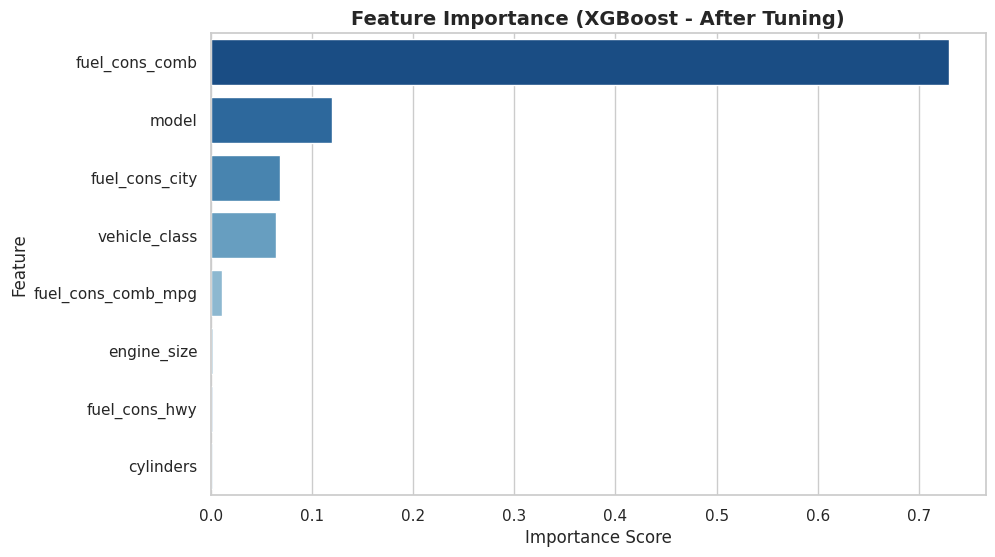

In [191]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_imp_df, palette="Blues_r")

plt.title("Feature Importance (XGBoost - After Tuning)", fontsize=14, fontweight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

plt.savefig("feature_importance_xgboost.png", dpi=300, bbox_inches="tight")

plt.show()